In [1]:
# %matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
import random
from IPython import display

# Wyniki wielu gier

## Rozkład wyników dla wskazanej liczby gier

Poniżej możesz wybrać:

 - ile razy Python ma zagrać w grę
 - jaka jest cena gry
 - jaka jest stawka początkowa

In [15]:
liczba_gier = 100
cena_gry = 7
stawka_poczatkowa = 2

In [3]:
def game_simulator(n_throws, starting_score):
    score = starting_score
    coin_results = random.choices([0, 1], k = 5)
    for coin_result in coin_results:
        if coin_result == 1:
            break
        else:
            score = score*2
    return score

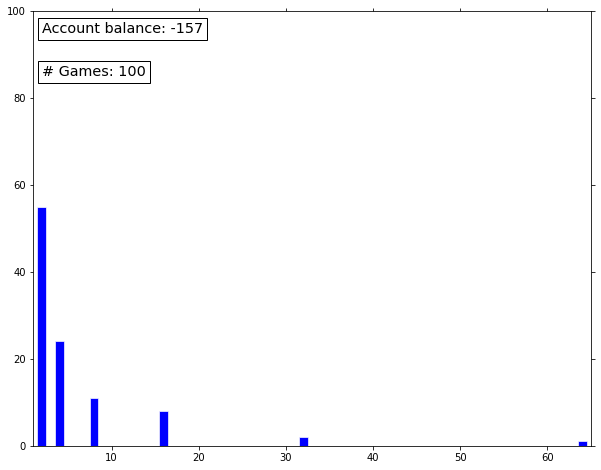

In [4]:
game_results = dict()

figure, ax = plt.subplots(figsize=(10, 8))

account_balance = 0

for i in range(liczba_gier+1):
    if (i+1)%5 == 0:
        ax.clear()
    ax.texts = []
    ax.set_ylim(bottom = 0, top = liczba_gier)
    ax.set_xlim(left = stawka_poczatkowa-1, right = stawka_poczatkowa*2**5+1)
    game_result = game_simulator(5, stawka_poczatkowa)
    account_balance += (game_result - cena_gry)
    if game_results.get(game_result) is None:
        game_results[game_result] = 1
    else:
        game_results[game_result] += 1
    hist1 = ax.bar(list(game_results.keys()), list(game_results.values()), width=1, edgecolor="white", linewidth=0.7, color = 'blue')
    account_balance_text = ax.text(x = min(list(game_results.keys())), y = liczba_gier*0.95, s = 'Account balance: ' + str(account_balance), 
             bbox=dict(facecolor='white', alpha=1), fontsize = 'x-large')
    games_n_text = ax.text(x = min(list(game_results.keys())), y = liczba_gier*0.85, s = '# Games: ' + str(i), 
             bbox=dict(facecolor='white', alpha=1), fontsize = 'x-large')
    display.clear_output(wait=True)
    display.display(figure)
    time.sleep(0.02)
plt.close()

## Rozkład środków na koncie dla wielu osób grających wiele razy

Poniżej możesz wybrać, ile osób gra w grę. Każda osoba będzie grała liczbę razy wskazaną w poprzednim podrozdziale.

In [5]:
liczba_osob = 10000

In [6]:
def account_balance_simulator(n_games, n_throws, game_price, starting_price):
    account_balance = 0
    for i in range(n_games):
        game_result = game_simulator(n_throws, starting_price)
        account_balance += (game_result - game_price)
    return account_balance

In [16]:
account_results = dict()
for i in range(liczba_osob):
    account_balance = account_balance_simulator(liczba_gier, 5, cena_gry, stawka_poczatkowa)
    if account_results.get(account_balance) is None:
        account_results[account_balance] = 1
    else:
        account_results[account_balance] += 1

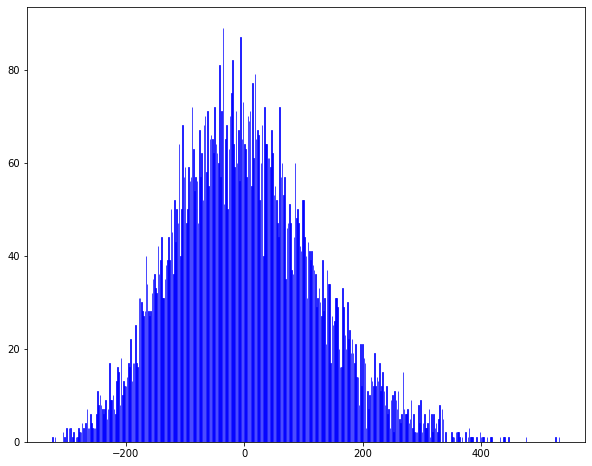

In [17]:
fig_normal, ax_normal = plt.subplots(figsize=(10, 8))
hist_normal = ax_normal.bar(list(account_results.keys()), list(account_results.values()), width=1, edgecolor="blue", linewidth=0.7, color = 'blue')
display.display(fig_normal)
plt.close()